# Gradient Descent Testing

## Info
Modules Used
- Matplotlib (if you want to visualise)
- Random (If you want to create random set of training data / train-test-split)

Parameters (for OK results)
- Quartic - learning = 0.0000000003
- Cubic - learning = 0.00000003
- Quadratic - learning = 0.000001
- Linear - learning = 0.0003
- In general for each extra polynomial term you add it should be ~100x smaller

## Import modules

In [69]:
import random
import matplotlib.pyplot as plt



## Function to return the y value when inputted x coordinate and coefficents of a curve

In [70]:
coefficients = [-2, -30, 10, 25, -6]


def line(x, coeff):
    y = 0
    for i in range(len(coeff)):
        y += coeff[-i - 1] * (x ** i)

    return y



## Generate test points on a line with a little offset

In [71]:
points = []
offsetRange = 0.3
for i in range(100):
    x = random.uniform(-10, 10)
    y = line(x, coefficients)
    offset = random.uniform(-1.0, 1) * offsetRange
    point = (x + offset, y + offset)
    points.append(point)

x_coordinates = [i[0] for i in points]
y_coordinates = [i[1] for i in points]


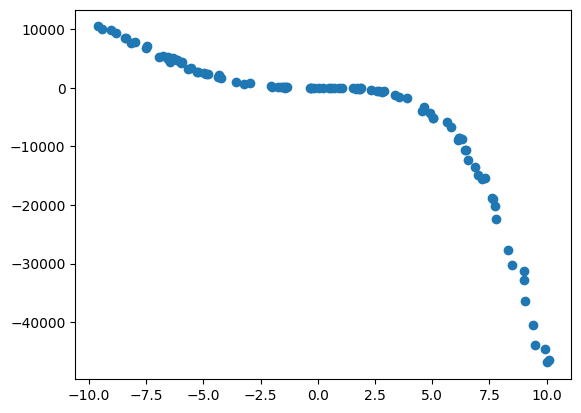

In [72]:
plt.scatter(x_coordinates, y_coordinates)



## Defining a Loss function

Here we use Residual sum of squares 

In [73]:
def sum_of_squared_residuals(coeff):
    sum = 0
    for x, y in zip(x_coordinates, y_coordinates):
        sum += (y - line(x, coeff)) ** 2

    return sum


### These are for calculating the gradient at a certain point on our RSS curve

In [74]:
def get_part_dif(_coeff, diff_to, _point):
    mult = -2 * (_point[0] ** (len(_coeff) - diff_to - 1))
    calc = _point[1] - line(_point[0], _coeff)
    return calc * mult


In [75]:
def get_RSS_dif(_coeff, respect_to):
    der = 0
    for x, y in zip(x_coordinates, y_coordinates):
        der += get_part_dif(_coeff, respect_to, [x, y])
    return der




## Gradient Descent Algorithm

In [76]:
a = random.uniform(-10, 10)
b = random.uniform(-10, 10)
c = random.uniform(-10, 10)

coefficient_count = len(coefficients)

temp_coeff = [random.uniform(-10, 10) for i in range(coefficient_count)]
temp_steps = [0 for i in range(coefficient_count)]

learning = 0.0000000003
attempts = 50000
debug = False
alphabet = 'abcdefg'
print(coefficients)

for i in range(attempts):
    if (debug):
        print(f'iter {i}')
        SSR = sum_of_squared_residuals([a, b, c])
        print(f'SSR = {SSR} \n')

    for i in range(coefficient_count):

        temp_steps[i] = -learning * get_RSS_dif(temp_coeff, i)
        if (debug):
            print(f'{alphabet[i]} = {temp_coeff[i]}')
            print(f'step_{alphabet[i]} = {temp_steps[i]}')
        temp_coeff[i] += temp_steps[i]

    if (debug):
        print()
    all_below = True
    for i in temp_steps:
        if abs(i) > 0.0001:
            all_below = False

    if all_below:
        break

print(temp_coeff)


[-2, -30, 10, 25, -6]
[-1.8415047707576189, -29.510303034223554, 2.2172424850464307, 5.465327218273902, -3.89023181684948]


## Plotting test data against Predicted curve

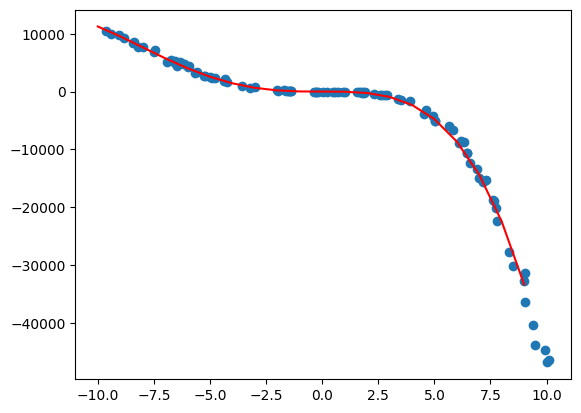

In [77]:
Npoints = []
ranges = [-10, 10]
for i in range(ranges[0], ranges[1]):
    x = i
    y = line(x, temp_coeff)
    point = (x, y)
    Npoints.append(point)

Nx_coordinates = [i[0] for i in Npoints]
Ny_coordinates = [i[1] for i in Npoints]

plt.scatter(x_coordinates, y_coordinates)
plt.plot(Nx_coordinates, Ny_coordinates, c='r')